# Introduction to Regression with ```statsmodels``` in Python

## Chapter 4: Simple Logistic Regression Modeling

In [20]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import logit
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_csv("churn.csv")
churn

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640
...,...,...,...
395,1,1.077655,0.878567
396,1,-1.273770,-0.869016
397,1,-0.426195,0.684666
398,1,0.818836,1.428091


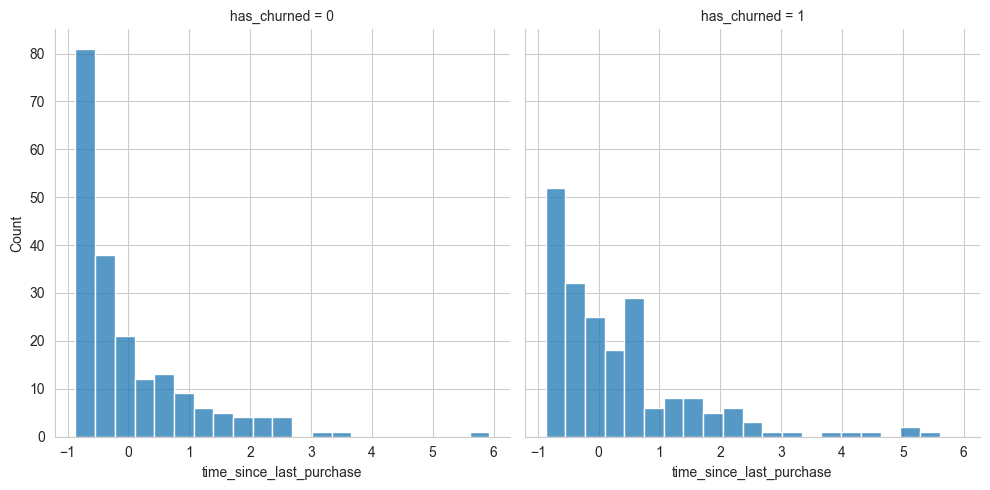

In [3]:
# Create the histograms of time_since_last_purchase split by has_churned
sns_first = sns.displot(data=churn, x="time_since_last_purchase", col="has_churned")

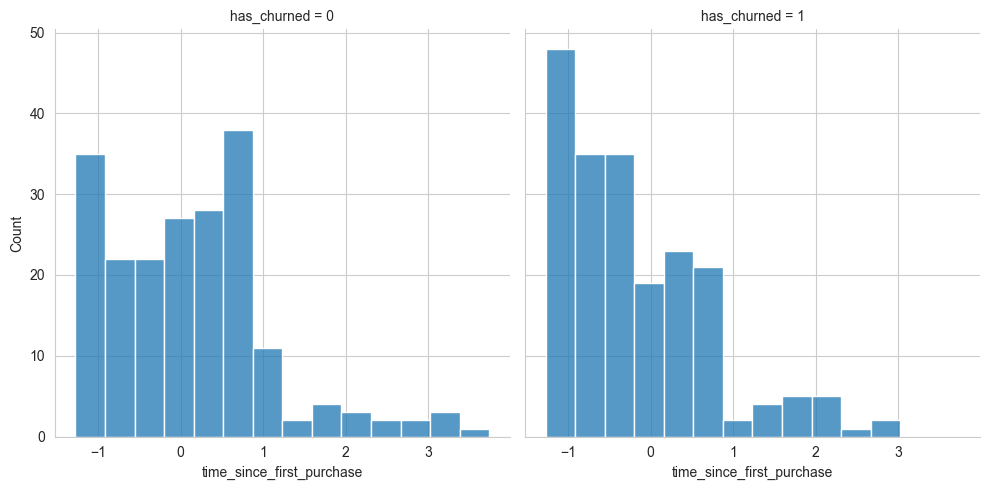

In [4]:
# Redraw the plot with time_since_first_purchase
sns_last = sns.displot(data=churn, x="time_since_first_purchase", col="has_churned")

In the ```time_since_last_purchase``` plot, the distribution of churned customers was further right than the distribution of non-churned customers (churners typically have longer times since their last purchase). For ```time_since_first_purchase``` the opposite is true: churners have a shorter length of relationship.

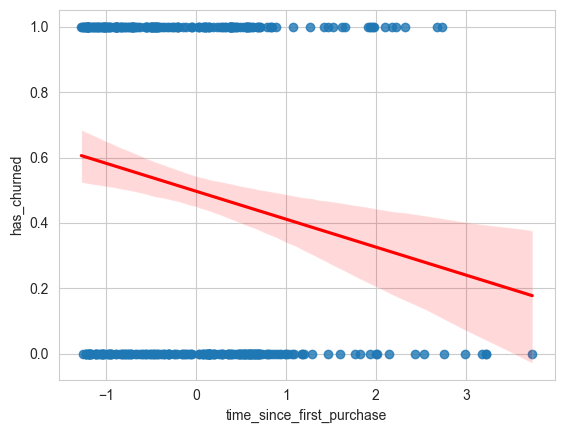

In [5]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns_reg = sns.regplot(
    data=churn, x="time_since_first_purchase", y="has_churned",
    line_kws={"color": "red"}
)

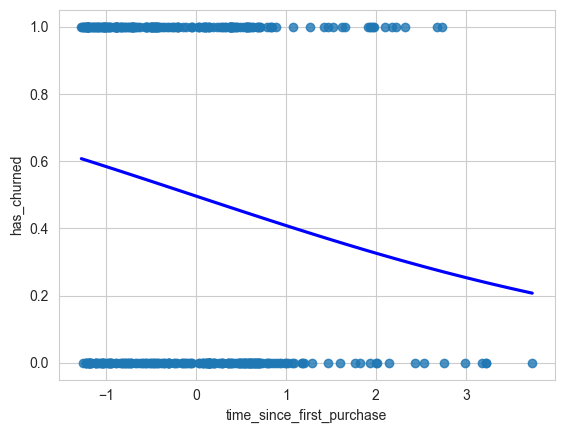

In [6]:
# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns_logit = sns.regplot(
    x="time_since_first_purchase",
    y="has_churned",
    data=churn,
    ci=None,
    logistic=True,
    line_kws={"color": "blue"}
)

<Axes: xlabel='time_since_first_purchase', ylabel='has_churned'>

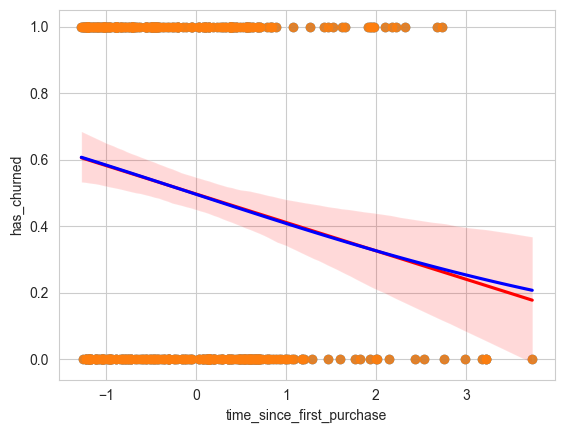

In [7]:
sns.regplot(
    data=churn, x="time_since_first_purchase", y="has_churned",
    line_kws={"color": "red"}
)
sns.regplot(
    x="time_since_first_purchase",
    y="has_churned",
    data=churn,
    ci=None,
    logistic=True,
    line_kws={"color": "blue"}
)

The two models give similar predictions in some places, but notice the slight curve in the logistic model trend.

In [8]:
# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


In [9]:
explanatory_data = pd.DataFrame({'time_since_first_purchase': np.arange(-1.5, 4.25, 0.25)})
explanatory_data

,time_since_first_purchase
0,-1.50
1,-1.25
2,-1.00
3,-0.75
4,-0.50
5,-0.25
6,0.00
7,0.25
8,0.50
9,0.75


In [10]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned=mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.50     0.626448
1                      -1.25     0.605470
2                      -1.00     0.584096
3                      -0.75     0.562401
4                      -0.50     0.540465


<Axes: xlabel='time_since_first_purchase', ylabel='has_churned'>

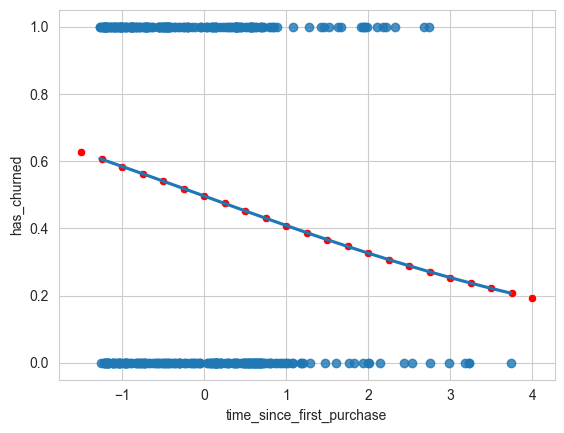

In [11]:
# Create a scatter plot with logistic trend line
sns.regplot(
    x="time_since_first_purchase",
    y="has_churned",
    data=churn,
    ci=None,
    logistic=True
)

# Overlay with prediction_data, colored red
sns.scatterplot(
    x="time_since_first_purchase",
    y="has_churned",
    data=prediction_data,
    color="red"
)

In [13]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.50     0.626448                  1.0
1                      -1.25     0.605470                  1.0
2                      -1.00     0.584096                  1.0
3                      -0.75     0.562401                  1.0
4                      -0.50     0.540465                  1.0


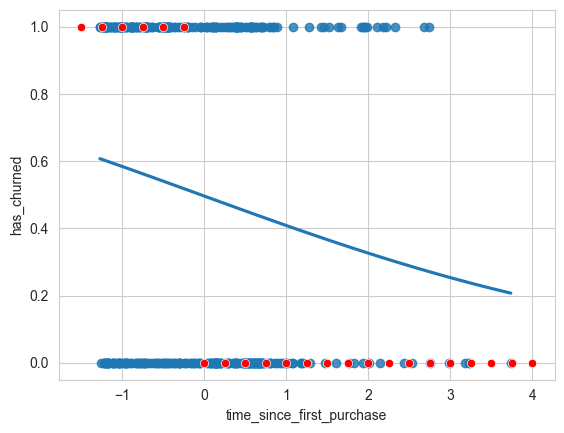

In [14]:
fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(
    x="time_since_first_purchase",
    y="most_likely_outcome",
    data=prediction_data,
    color="red"
)

plt.show()

Providing the most likely response is a great way to share the model results with a non-technical audience.

In [15]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.50     0.626448                  1.0    1.677003
1                      -1.25     0.605470                  1.0    1.534661
2                      -1.00     0.584096                  1.0    1.404400
3                      -0.75     0.562401                  1.0    1.285197
4                      -0.50     0.540465                  1.0    1.176111


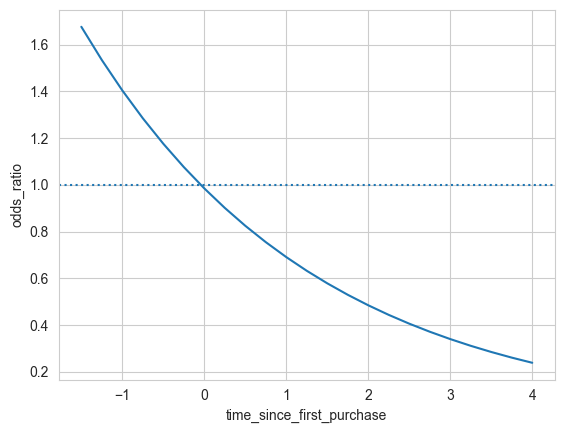

In [16]:
fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(
    y="odds_ratio",
    x="time_since_first_purchase",
    data=prediction_data
)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

In [17]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.50     0.626448                  1.0    1.677003   
1                      -1.25     0.605470                  1.0    1.534661   
2                      -1.00     0.584096                  1.0    1.404400   
3                      -0.75     0.562401                  1.0    1.285197   
4                      -0.50     0.540465                  1.0    1.176111   

   log_odds_ratio  
0        0.517008  
1        0.428309  
2        0.339610  
3        0.250912  
4        0.162213  


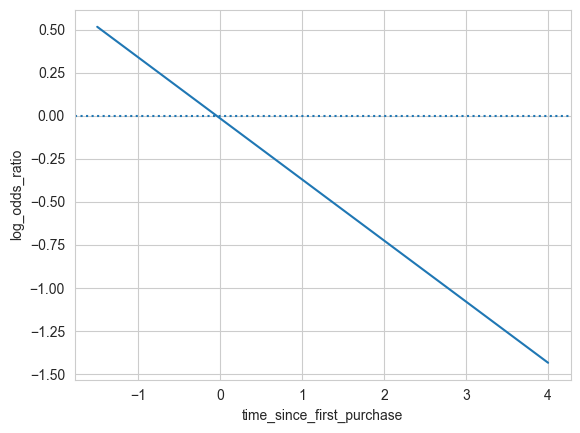

In [18]:
fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

In [19]:
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
Name: count, dtype: int64


[[112.  88.]
 [ 76. 124.]]


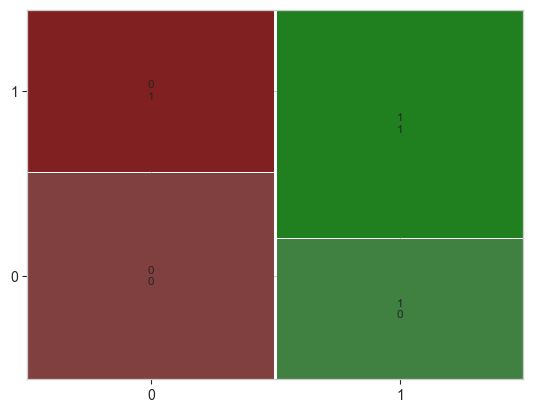

In [21]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

In [22]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = (TP) / (TP + FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = (TN) / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
